In [1]:
# Import the FEMSystem Class from directory above
import sys
sys.path.append('..')
from FEMSystem import FEMSystem

import jax.numpy as jnp
import pickle
import matplotlib.pyplot as plt

In [2]:
pickled_obj = {}

with open('./plots/results.pkl', 'rb') as f:
    pickled_obj= pickle.load(f)

femsystem:FEMSystem = pickled_obj["femsystem"]
femsystem.saveFigsDir = None # Turn OFF saving plots
u_even,u_odd = pickled_obj["u_even"],pickled_obj["u_odd"]
u_even_interior,u_odd_interior = u_even[femsystem.interior_dofs],u_odd[femsystem.interior_dofs]
theta_at_dofs = pickled_obj["theta_at_dofs"]
n,N,coeffs = pickled_obj["n"],pickled_obj["N"],pickled_obj["coeffs"]

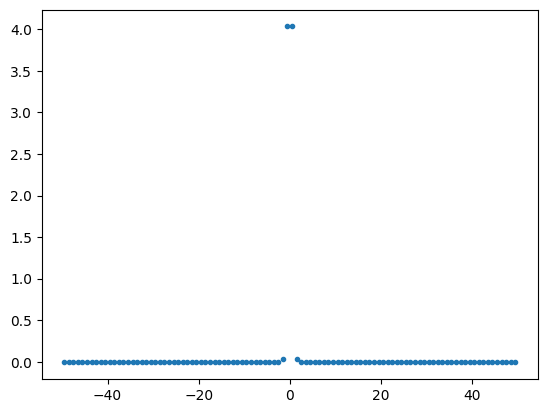

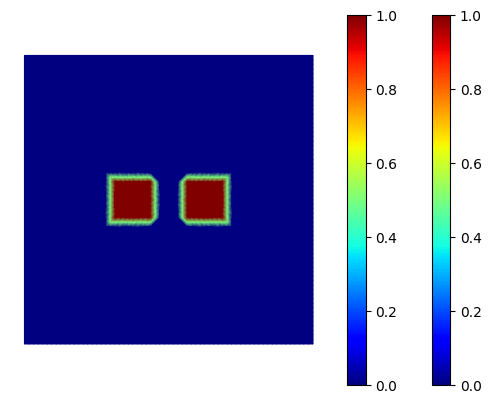

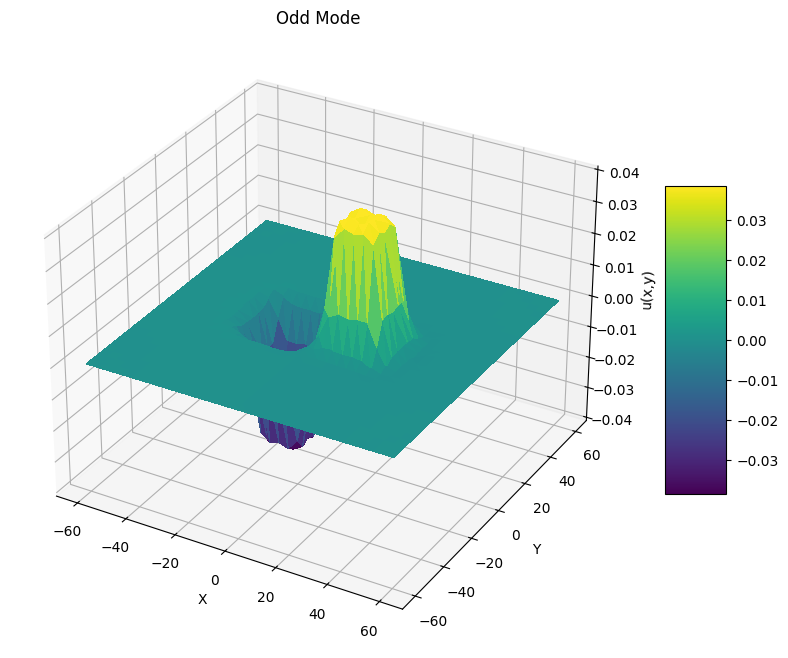

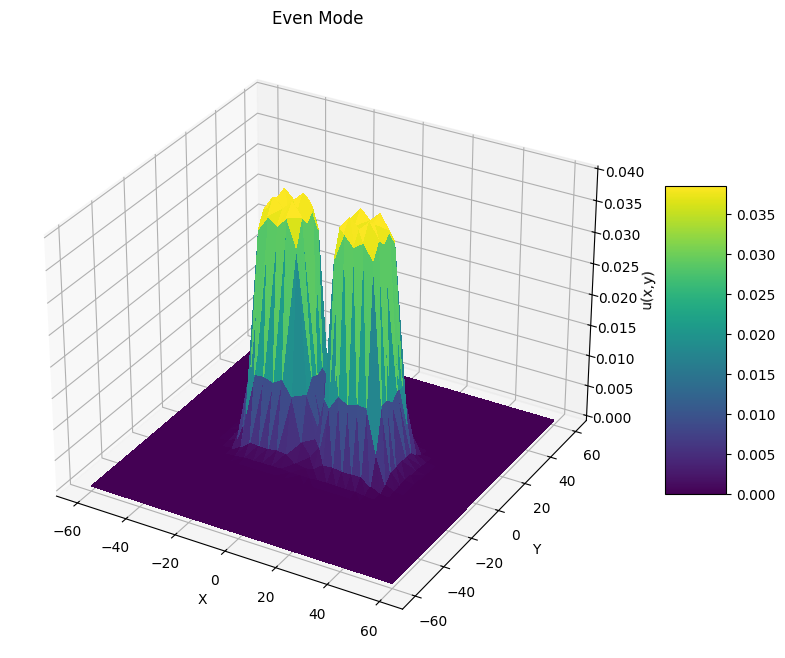

In [3]:
x = (n-1)/2 - jnp.arange(n)
plt.plot(x,coeffs,".")
femsystem.plot_at_interior_2d(theta_at_dofs[femsystem.interior_dofs])
femsystem.plot_at_interior_2d_in3d(u_odd_interior,plot_title="Odd Mode")
femsystem.plot_at_interior_2d_in3d(u_even_interior,plot_title="Even Mode")

In [ ]:
integrated_area = femsystem.integrate(lambda u,grad_u,x: u,theta_at_dofs)
G_mat = femsystem.get_greens_kernel()

# U_{++++} or U_{----}, Really N * \alpha
def alpha(u,G_mat):
    return integrated_area  * femsystem.double_integral(lambda u1,a,b,c,d: u1**2,lambda u1,a,b,c,d: u1**2,G_mat,u,u)

# U_{+--+} = U{-++-} - Remember middle two are wrt to y, Outer two wrt to x, from notation used in doc
def beta(u1_arg,u2_arg,G_mat):
    return integrated_area * femsystem.double_integral(lambda u1,a,b,c,d: u1**2, lambda a,b,u2,c,d: u2**2, G_mat, u1_arg,u2_arg)

# U_{++--} = U{+-+-}
def gamma(u1_arg,u2_arg,G_mat):
    return integrated_area * femsystem.double_integral(lambda u1,a,u2,c,d: u1*u2, lambda u1,b,u2,c,d: u1*u2, G_mat, u1_arg,u2_arg)

lambda_y = 2*beta(u_even,u_odd,G_mat) - alpha(u_even,G_mat)- alpha(u_odd,G_mat)
lambda_x = lambda_y + 4*gamma(u_even,u_odd,G_mat)
print(lambda_y,lambda_x)

/scratch/gpfs/AROD/vc9839/finite-island-cqed/jax-gpu/lib64/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/scratch/gpfs/AROD/vc9839/finite-island-cqed/jax-gpu/lib64/python3.9/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


-0.027877808 198.76384


: 